In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Load the uploaded CSV
data = pd.read_csv('/Users/adarshnagia/Downloads/student_study_data.csv')
data.head()


,Study Hours,Attendance,Pass
0,8.5,53.8,0
1,6.6,68.7,0
2,8.9,69.9,0
3,11.6,63.0,0
4,6.3,72.6,0


In [3]:
data.isnull().sum()


Study Hours    0
Attendance     0
Pass           0
dtype: int64

In [4]:
data.describe()


,Study Hours,Attendance,Pass
count,100.000000,100.000000,100.000000
mean,6.695000,74.881000,0.270000
std,2.702314,13.298771,0.446196
min,0.000000,46.200000,0.000000
25%,5.200000,62.950000,0.000000
50%,6.650000,76.250000,0.000000
75%,8.200000,83.050000,1.000000
max,12.600000,100.000000,1.000000


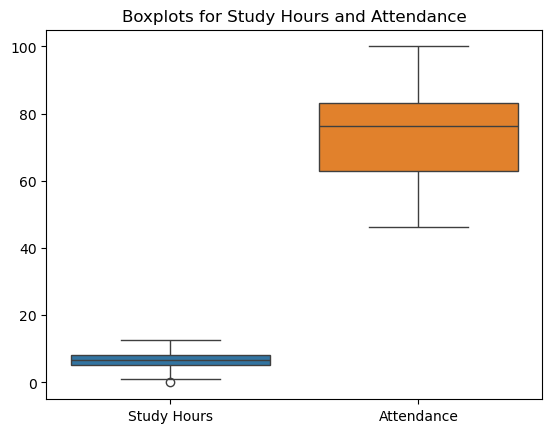

In [5]:
sns.boxplot(data=data[['Study Hours', 'Attendance']])
plt.title("Boxplots for Study Hours and Attendance")
plt.show()


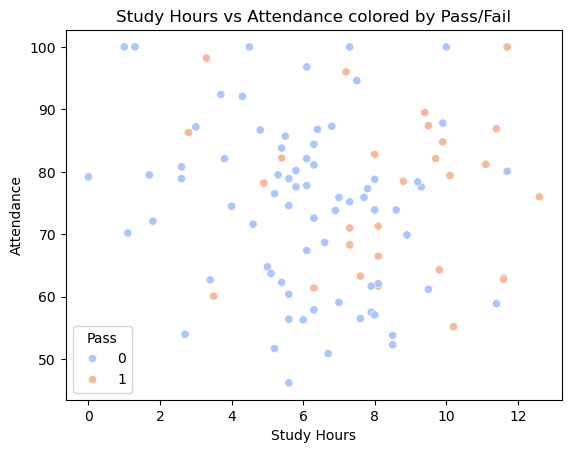

In [6]:
sns.scatterplot(
    x='Study Hours', y='Attendance',
    hue='Pass', data=data, palette='coolwarm'
)
plt.title("Study Hours vs Attendance colored by Pass/Fail")
plt.show()


In [7]:
X = data[['Study Hours', 'Attendance']]
y = data['Pass']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.70


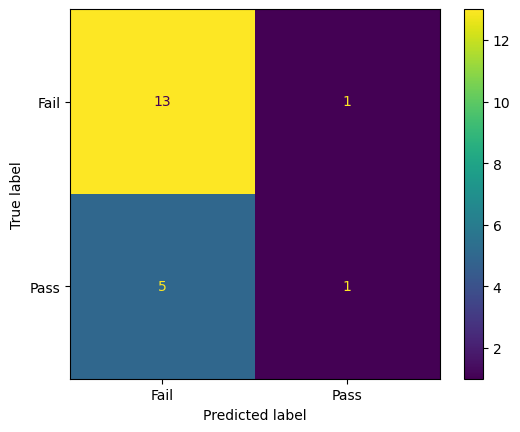

In [10]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot()
plt.show()


In [11]:
coefficients = pd.DataFrame({
    'Feature': ['Study Hours', 'Attendance'],
    'Coefficient': model.coef_[0]
})
print(coefficients)


       Feature  Coefficient
0  Study Hours     0.351102
1   Attendance     0.021868
